In [127]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [128]:
#LOAD DATA
Test = pd.read_csv('housing_test_clean.csv')
Train = pd.read_csv('housing_train_clean.csv')

In [129]:
X_train=Train.copy()
X_train.drop(['SalePrice'], axis=1, inplace=True)
Y_train=Train[['SalePrice']].copy()
X_test=Test.copy()
X_test.drop(['SalePrice'], axis=1, inplace=True)
Y_test=Test[['SalePrice']].copy()

In [130]:
#CONVERT TO NUMPY
X_train=X_train.values
Y_train=Y_train.values.reshape(-1)
X_test=X_test.values
Y_test=Y_test.values.reshape(-1)

In [131]:
scaler=MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [176]:
X_train_s.shape

(1460, 275)

In [133]:
1460*.9

1314.0

In [134]:
X_train=X_train_s
X_test=X_test_s

In [135]:
idx_list=np.arange(0, X_train.shape[0])
train_idx=idx_list[0:1314]
val_idx=idx_list[1314:]

In [136]:
X_val=X_train[val_idx]
Y_val=Y_train[val_idx]
X_train=X_train[train_idx]
Y_train=Y_train[train_idx]

In [137]:
X_train

array([[0.11977972, 0.41355932, 0.        , ..., 0.94927536, 0.88333333,
        0.5       ],
       [0.21294172, 0.        , 0.        , ..., 0.75362319, 0.43333333,
        0.25      ],
       [0.13446535, 0.41937046, 0.        , ..., 0.93478261, 0.86666667,
        0.5       ],
       ...,
       [0.21569527, 0.        , 0.        , ..., 0.96376812, 0.95      ,
        0.25      ],
       [0.25676916, 0.65714286, 0.        , ..., 0.85507246, 0.66666667,
        0.25      ],
       [0.24965581, 0.56997579, 0.        , ..., 0.92028986, 0.81666667,
        1.        ]])

In [138]:
X_train.shape

(1314, 275)

In [139]:
Y_train.shape

(1314,)

In [140]:
X_val.shape

(146, 275)

In [141]:
Y_val.shape

(146,)

In [142]:
X_test.shape

(1459, 275)

In [143]:
Y_test.shape

(1459,)

In [144]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

In [145]:
n_list=np.arange(1, 100, 10)

In [146]:
mse_train_list=[]
mse_val_list=[]
KNNmodel_list=[]
for n in n_list:
    KNNmodel=KNeighborsRegressor(n_neighbors=n)
    KNNmodel.fit(X_train, Y_train)
    KNNmodel_list.append(model)
    Y_train_pred = KNNmodel.predict(X_train)
    mse_train=np.mean((Y_train_pred-Y_train)**2)
    mse_train_list.append(mse_train)
    #mse_val is the mse on the validation set
    Y_val_pred = KNNmodel.predict(X_val)
    mse_val=np.mean((Y_val_pred-Y_val)**2)
    mse_val_list.append(mse_val)

In [147]:
np.array(mse_train_list)

array([0.00000000e+00, 1.53197695e+09, 1.77581810e+09, 1.92715980e+09,
       2.01965614e+09, 2.12728723e+09, 2.20750773e+09, 2.28446038e+09,
       2.35848393e+09, 2.43143340e+09])

In [148]:
np.array(mse_val_list)

array([1.82978271e+09, 1.32082314e+09, 1.41433318e+09, 1.46433351e+09,
       1.52639002e+09, 1.65402957e+09, 1.72685649e+09, 1.77411908e+09,
       1.81875027e+09, 1.87139193e+09])

Text(0.5, 1.0, 'val mse vs n')

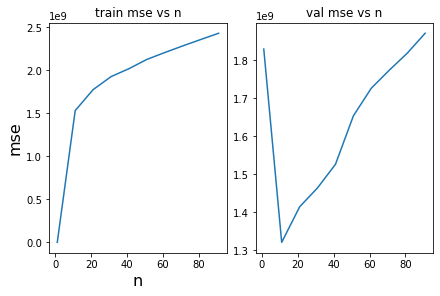

In [149]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, constrained_layout =True)
ax[0].plot(n_list, mse_train_list)
ax[0].set_title('train mse vs n')
ax[0].set_xlabel('n', fontsize=16)
ax[0].set_ylabel('mse', fontsize=16)
ax[1].plot(n_list, mse_val_list)
ax[1].set_title('val mse vs n')

In [150]:
n_best=n_list[np.argmin(mse_val_list)]
n_best

11

In [151]:
KNNmodel= KNeighborsRegressor(n_neighbors = 11)
KNNmodel

KNeighborsRegressor(n_neighbors=11)

In [152]:
KNNmodel.fit(X_train, Y_train)
Y_train_pred = KNNmodel.predict(X_train)
mse_train=np.mean((Y_train_pred-Y_train)**2)
mse_train

1531976945.446501

In [153]:
Y_val_pred = KNNmodel.predict(X_val)
mse_val=np.mean((Y_val_pred-Y_val)**2)
mse_val

1320823140.3141062

In [154]:
Y_test_pred = KNNmodel.predict(X_test)
mse_test=np.mean((Y_test_pred-Y_test)**2)
mse_test

1405471691.936228

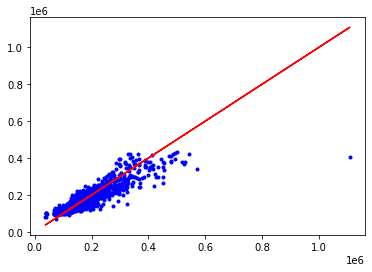

In [155]:
fig, ax = plt.subplots()
ax.plot(Y_test, Y_test_pred, '.b')
#the 45-degree line
ax.plot(Y_test, Y_test, '-r')

In [156]:
KNNMSE = np.mean((Y_test - Y_test_pred)**2)
KNNMAE = np.mean(np.abs(Y_test - Y_test_pred))
KNNMAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('KNNMSE=', KNNMSE)
print('KNNMAE=', KNNMAE)
print('KNNMAPE=', KNNMAPE)

KNNMSE= 1405471691.936228
KNNMAE= 22979.739413903488
KNNMAPE= 0.13049181591544137


In [157]:
#DECISIONTREE 
from sklearn.tree import DecisionTreeRegressor

In [158]:
max_depth_list=np.arange(1, 100, 10)
max_depth_list

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [159]:
acc_train_list=[]
acc_val_list=[]
for max_depth in max_depth_list:
    Treemodel = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    Treemodel.fit(X_train, Y_train)
    acc_train=Treemodel.score(X_train, Y_train)
    acc_train_list.append(acc_train)
    acc_val=Treemodel.score(X_val, Y_val)
    acc_val_list.append(acc_val)
    print("max_depth", max_depth, "acc_val", acc_val)

max_depth 1 acc_val 0.39668647189914785
max_depth 11 acc_val 0.7742664692753441
max_depth 21 acc_val 0.7272055160970081
max_depth 31 acc_val 0.7426430527742298
max_depth 41 acc_val 0.7426430527742298
max_depth 51 acc_val 0.7426430527742298
max_depth 61 acc_val 0.7426430527742298
max_depth 71 acc_val 0.7426430527742298
max_depth 81 acc_val 0.7426430527742298
max_depth 91 acc_val 0.7426430527742298


Text(0, 0.5, 'acc_val')

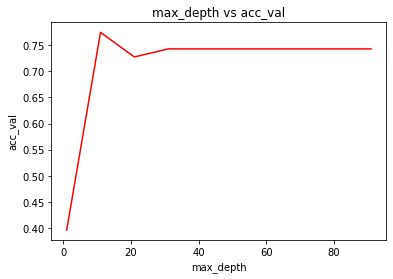

In [160]:
plt.plot(max_depth_list, acc_val_list, '-r')
plt.title('max_depth vs acc_val')
plt.xlabel('max_depth')
plt.ylabel('acc_val')

In [161]:
max_depth_best=11

In [162]:
Treemodel = DecisionTreeRegressor(max_depth=max_depth_best, random_state=0)
Treemodel.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=11, random_state=0)

In [163]:
Treemodel.score(X_train, Y_train)
Treemodel.score(X_test, Y_test)
Y_test_pred = Treemodel.predict(X_test)

In [164]:
DTMSE = np.mean((Y_test - Y_test_pred)**2)
DTMAE = np.mean(np.abs(Y_test - Y_test_pred))
DTMAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('DTMSE=', DTMSE)
print('DTMAE=', DTMAE)
print('DTMAPE=', DTMAPE)

DTMSE= 1495230768.9417543
DTMAE= 20391.174190439957
DTMAPE= 0.11594535755075622


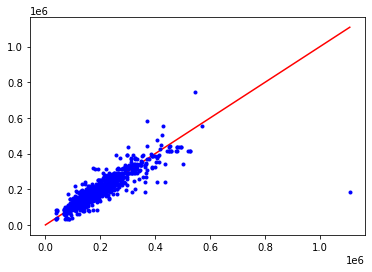

In [165]:
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred, '.b')

In [166]:
#RANDOMFOREST
from sklearn.ensemble import RandomForestRegressor

In [167]:
max_depth_list=np.arange(1, 100, 10)
max_depth_list

array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [168]:
acc_train_list=[]
acc_val_list=[]
for max_depth in max_depth_list:
    RFmodel = RandomForestRegressor(n_estimators=100, max_samples=0.8, max_depth=max_depth, random_state=0)
    RFmodel.fit(X_train, Y_train)
    acc_train=RFmodel.score(X_train, Y_train)
    acc_train_list.append(acc_train)
    acc_val=RFmodel.score(X_val, Y_val)
    acc_val_list.append(acc_val)
    print("max_depth", max_depth, "acc_val", acc_val)


max_depth 1 acc_val 0.45441861058633026
max_depth 11 acc_val 0.8657918172093493
max_depth 21 acc_val 0.8628188826820211
max_depth 31 acc_val 0.8629815298339747
max_depth 41 acc_val 0.8629815298339747
max_depth 51 acc_val 0.8629815298339747
max_depth 61 acc_val 0.8629815298339747
max_depth 71 acc_val 0.8629815298339747
max_depth 81 acc_val 0.8629815298339747
max_depth 91 acc_val 0.8629815298339747


Text(0, 0.5, 'acc_val')

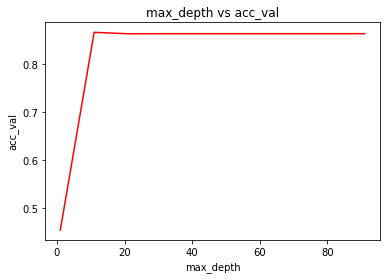

In [169]:
plt.plot(max_depth_list, acc_val_list, '-r')
plt.title('max_depth vs acc_val')
plt.xlabel('max_depth')
plt.ylabel('acc_val')

In [170]:
max_depth_best=11

In [171]:
RFmodel = RandomForestRegressor(n_estimators=100, max_samples=0.8, max_depth=max_depth_best, random_state=0)
RFmodel.fit(X_train, Y_train)

RandomForestRegressor(max_depth=11, max_samples=0.8, random_state=0)

In [172]:
RFmodel.score(X_train, Y_train)
RFmodel.score(X_test, Y_test)
Y_test_pred = RFmodel.predict(X_test)

In [173]:
RFMSE = np.mean((Y_test - Y_test_pred)**2)
RFMAE = np.mean(np.abs(Y_test - Y_test_pred))
RFMAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('RFMSE=', RFMSE)
print('RFMAE=', RFMAE)
print('RFMAPE=', RFMAPE)

RFMSE= 595391909.2720538
RFMAE= 11217.15077625859
RFMAPE= 0.06485301218025818


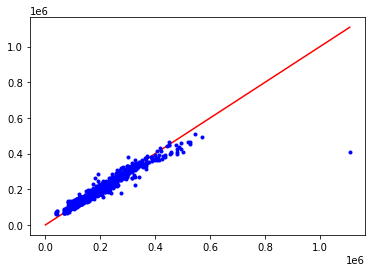

In [179]:
fig, ax = plt.subplots()
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
x_45_degree_line=np.linspace(0, Y_test.max(), 100)
ax.plot(x_45_degree_line, x_45_degree_line, '-r')
ax.plot(Y_test, Y_test_pred, '.b')

In [180]:
from tabulate import tabulate
table = [['', 'KNNRegressor', 'DecisionTree', 'RandomForest'], 
         ['MSE', KNNMSE, DTMSE, RFMSE], 
         ['MAE', KNNMAE, DTMAE, RFMAE], 
         ['MAPE', KNNMAPE, DTMAPE, RFMAPE]]

print(tabulate(table))

----  -------------------  -------------------  -------------------
      KNNRegressor         DecisionTree         RandomForest
MSE   1405471691.936228    1495230768.9417543   595391909.2720538
MAE   22979.739413903488   20391.174190439957   11217.15077625859
MAPE  0.13049181591544137  0.11594535755075622  0.06485301218025818
----  -------------------  -------------------  -------------------
